In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


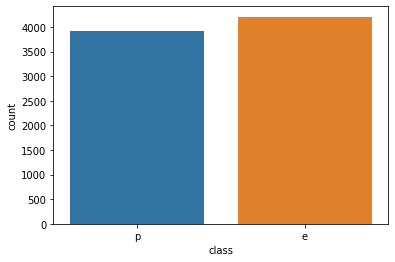

In [7]:
#check distribution

import seaborn as sns
sns.countplot(mushroom['class'],label="Count")
plt.show()

In [11]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
X = mushroom.iloc[:, 1:].values #isolate all input variable
y = mushroom.iloc[:, 0].values #isolate target variable

In [25]:
#encoding of independent variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = mushroom.iloc[:, 1:].apply(le.fit_transform).values

print(X)

[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


In [26]:
#encoding of dependent variable

from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)

print(y)

[1 0 0 ... 0 1 0]


In [28]:
#training
#must force remember this code

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
#scaling to normalise and prevent any inappropiate weightage of affected independent variable

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Accuracy is: 0.955076923076923


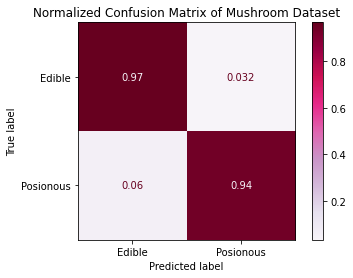

In [33]:
accuracies = dict()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

Accuracy is: 1.0


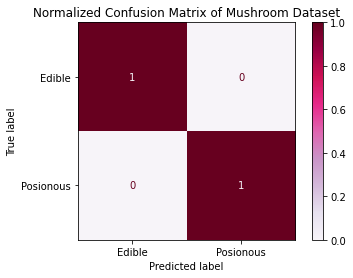

In [35]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Kernel SVM'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

Accuracy is: 0.9218461538461539


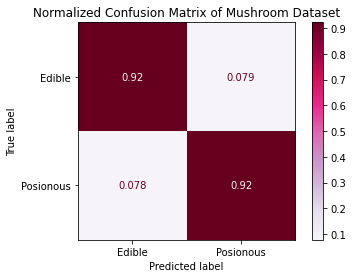

In [37]:

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

In [ ]:
#reference site 
#https://www.kaggle.com/tugcekiziltepe/mushroom-predictions-with-6-classification-models